<a href="https://colab.research.google.com/github/pranav-2410/Project-ML/blob/master/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1**. Importing the required libreries :


In [4]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1**.1  Importing the Dataset into data





In [5]:
#to import the dataset which is csv format, we use read_csv("file_name.csv")
 
data = pd.read_csv("data2.csv")

In [6]:
#to display the top 5 rows we use head() function

data.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#to display the bottom 5 rows we use tail() function
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1**.2 Checking the *DataTypes* and *Basic Summary Statistics*

In [8]:
#getting information about the columns regarding the dtypes and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
#checking the datatypes 

data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
#statistical summary

data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**1**.3 Knowing the *Shape* of the DataSet

In [11]:
#checking the shape 

data.shape

(11914, 16)

**1**.4 Checking for *Null values*

In [12]:
#null values are found 

data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

#**2** Dropping the less *Relevant columns*

In [13]:
#Market Category column can be dropped, as there is insufficiant data i.e having many null values
 
data.drop(['Market Category','Number of Doors'],axis=1,inplace=True)

In [14]:
#dataset after dropping 
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [15]:
#shape of the dataset after dropping market category

data.shape

(11914, 14)

#**3**  *Renaming* the columns 

In [16]:
#renaming can to done using rename() function
#renaming is done to
data.rename(columns= {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission",
                      "Driven_Wheels": "Drive Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"}, inplace= True)

data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#**4**.1   *Checking* for *Duplicate Rows* 

In [17]:
#to get the shape of duplicated data
duplicatedRows = data[data.duplicated()]
duplicatedRows.shape

(721, 14)

In [18]:
#the total number of duplicate rows can be known using duplicated() function
data.duplicated().sum()


721

**4**.2 *Dropping* the *Duplicated Rows*

In [19]:
#shape of dataset before dropping the duplicates
data.shape

(11914, 14)

In [20]:
#dropping the duplicate rows
data=data.drop_duplicates()

data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [21]:
#shape of dataset after dropping the duplicates
data.shape

(11193, 14)

**4**.3 Checking for *Null Values* and  *Missing Values* 

In [22]:
#to know the null or missing data we use the function isnull()
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

````
As there are only few number of missing data, we could drop the missing data
````

**4**.4 Dropping of  *Missing Data* 

In [23]:
#shape of the dataset before dropping the missing values
data.shape

(11193, 14)

In [24]:
#to drop the missing or null values we use 
data = data.dropna()


In [25]:
#shape of the dataset after dropping the missing data
data.shape

(11092, 14)

In [26]:
#checking the number of missing values
data.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

#**5**.1  Plotting *Graphs* for various columns   to check for *Outliers*


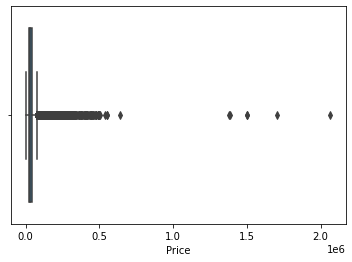

In [27]:
sns.boxplot(x= data["Price"])


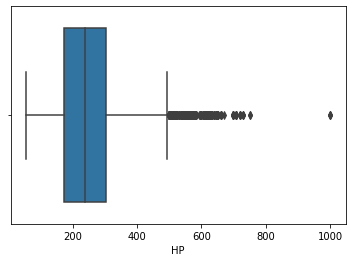

In [28]:
sns.boxplot(x=data["HP"])

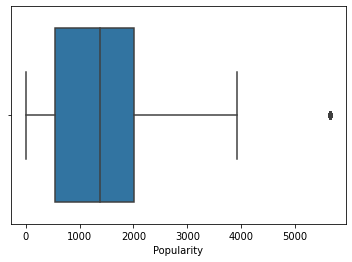

In [29]:
sns.boxplot(x=data["Popularity"])             #the number of outliers here are less


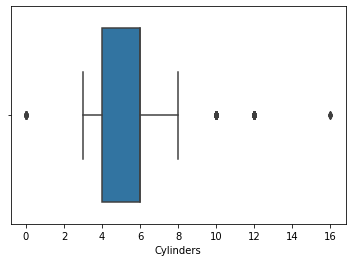

In [30]:
sns.boxplot(x=data["Cylinders"])

**5**.2 *Removing* the *Outliers*

```
*The outliers can be removed using Inter Quartile Range(IQR)

```

In [31]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1               
IQR

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21491.25
dtype: float64

```
*For finding out the Outlier using IQR we have to define a multiplier
 which is 1.5 ideally that will decide how far below Q1 and above Q3 will be considered as an Outlier
 *Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier
 ```

In [32]:
#shape of dataset before removing the outliers
data.shape

(11092, 14)

In [33]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

#shape of dataset after removing the outliers
data.shape

(8608, 14)

#**6**.1 Most *Represented* Car Brand


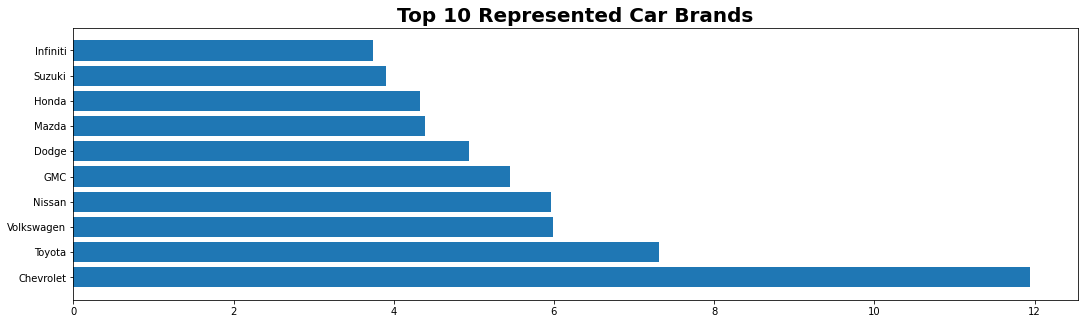

In [34]:
# Percentage of car per brand
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# Top 10 car brands
top_brands = counts.index[:10]
    
# Plotting
plt.figure(figsize=(18,5))                                  	                       #we adjust the graph size according to our convience, as done
plt.barh(top_brands,width=counts[:10])   
plt.title('Top 10 Represented Car Brands', weight= 'bold', fontsize= 20)             #we give the title of the graph as "Top 10 Represented car brands"
plt.show()                         

From the graph, it is clearly given the top 10 car brands



**6**.2 **Average Price** among the top car brands

In [35]:
avgPrices = data[['Make','Price']].loc[                                    #The loc() function is used to access a group of rows and columns using label's
               (data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Mazda')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Suzuki')|
               (data['Make'] == 'infiniti')].groupby('Make').mean()       #groupby() function is used to split the data into groups  
                                                                          #To get the mean or average of the data we use mean() function
print(avgPrices)

                   Price
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18164.098214
Toyota      29011.750397
Volkswagen  29032.817476


# **7**.  Plotting of **Correlation Matrix** 

A correlation matrix is a table showing **correlation coefficients** between variables. Each cell in the table shows the correlation between **two variables**

In [36]:
#We use corr() function to get the correlation matrix for the datset

data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330540,-0.094397,0.359829,0.323613,0.204453,0.591644
HP,0.330540,1.000000,0.741031,-0.465311,-0.563362,0.105691,0.743497
Cylinders,-0.094397,0.741031,1.000000,-0.697884,-0.750850,0.025803,0.392174
MPG-H,0.359829,-0.465311,-0.697884,1.000000,0.937936,0.080857,-0.127772
MPG-C,0.323613,-0.563362,-0.750850,0.937936,1.000000,0.070320,-0.202410
Popularity,0.204453,0.105691,0.025803,0.080857,0.070320,1.000000,0.116684
Price,0.591644,0.743497,0.392174,-0.127772,-0.202410,0.116684,1.000000


**Analysing the correlation matrix**:



1.   **HIGH CORRELATION:** 
                       Cylinders     &   Horse Power
                       Price         &   Horse Power
                       Highway MPG   &   City MPG
                       


2.   **HIGH ANTICORRELATION**
                      Cylinders   &    City MPG
                      Horse Power &    Highway MPG

                       



As the number of **Cylinders** increases, the **Horse Power** of the car increases
And beacuse of this the **Price** also increases.
By this we can  conclude that **Cylinders** and **Price** are also in correlation

As the **Cylinders** increases, the fuel counsumed per mile i.e **MPG**  decreases

There are different ways for visualizing a correlation matrix  :

1.   Heatmap
2.   Scatter plots



**Heatmap**

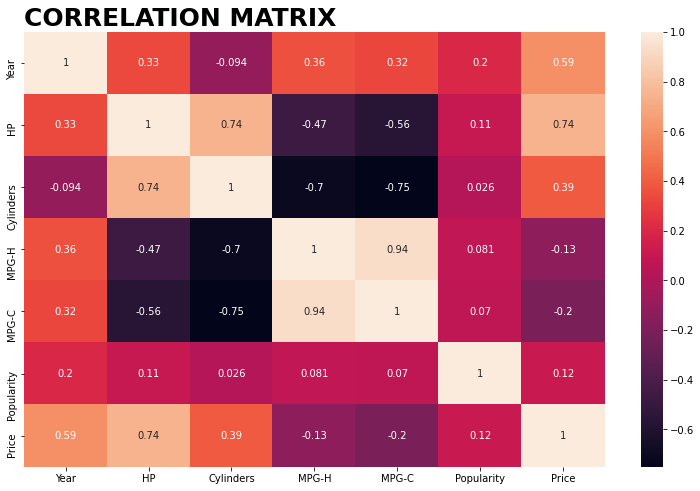

In [37]:
corrMatrix = data.corr()
plt.subplots(figsize = (13,8))                                                    #setting up the size
sns.heatmap(corrMatrix, annot=True)                                              
plt.title("CORRELATION MATRIX", weight = 'bold', fontsize= 25, loc= 'left' )      #giving title to the plot
plt.show()

**Scatter Plot**

A scatter plot is a diagram where each value in the data set is represented by a dot .Scatter plots are used to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price 



Text(0.0, 1.0, 'SCATTER PLOT FOR CORRELATION MATRIX')

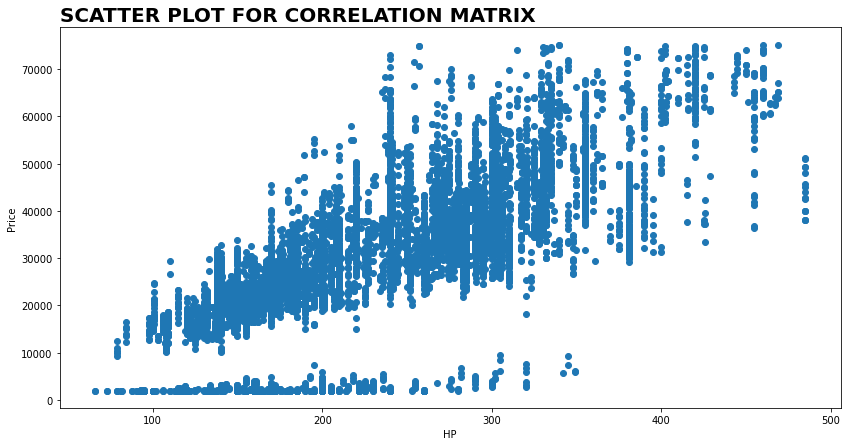

In [74]:
plt.subplots(figsize=(14,7))
plt.scatter(data['HP'],  data['Price'])
plt.xlabel('HP')
plt.ylabel('Price')
plt.title("SCATTER PLOT FOR CORRELATION MATRIX", weight= 'bold', fontsize=20, loc='left')


# 